In [534]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
from matplotlib.pyplot import figure

In [535]:
table_2 = pd.read_csv("./Kickstarter001.csv")
table_1 = pd.read_csv ("./Kickstarter.csv")
table_3 = pd.read_csv ("./Kickstarter002.csv")
table_4 = pd.read_csv ("./Kickstarter003.csv")
table_5 = pd.read_csv ("./Kickstarter056.csv")

In [536]:
data = pd.concat([table_1, table_2, table_3, table_4, table_5], axis=0)

In [537]:
df = data[['id','backers_count','category','country_displayable_name','location','created_at', 'launched_at', 'deadline','currency','pledged','goal','state'] ]

In [538]:
#function to load json objects and give nan if key not found
def category_func(x):
    if "parent_name" in json.loads(x):
        return json.loads(x)["parent_name"]
    else:
        return np.nan

df["sub category"] = df["category"].apply(lambda x: json.loads(x)["name"])
df["parent category"] = df["category"].apply(category_func)

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [539]:
# converting unix timestamp to date time object and stripping hours, minutes and seconds
df["created_at"] = df["created_at"].apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
df["launched_at"] = df["launched_at"].apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
df["deadline"] = df["deadline"].apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
df.sample(10)

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,id,backers_count,category,country_displayable_name,location,created_at,launched_at,deadline,currency,pledged,goal,state,sub category,parent category
171,1845181538,0,"{""id"":271,""name"":""Live Games"",""slug"":""games/li...",the United States,"{""id"":2485177,""name"":""Round Rock"",""slug"":""roun...",2015-07-29,2015-08-06,2015-09-05,USD,0.00,8000.0,canceled,Live Games,Games
2651,2030053012,34,"{""id"":22,""name"":""Illustration"",""slug"":""art/ill...",the United Kingdom,"{""id"":44418,""name"":""London"",""slug"":""london-gb""...",2019-12-27,2020-01-03,2020-01-23,GBP,596.69,250.0,live,Illustration,Art
2520,1122577938,1,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",the Netherlands,"{""id"":735219,""name"":""Zwolle"",""slug"":""zwolle-ov...",2018-05-17,2018-05-17,2018-07-01,EUR,1.00,85000.0,canceled,Footwear,Fashion
760,1551651172,50,"{""id"":41,""name"":""Jazz"",""slug"":""music/jazz"",""po...",the United States,"{""id"":2459115,""name"":""New York"",""slug"":""new-yo...",2010-11-10,2010-11-12,2011-01-11,USD,2140.00,2000.0,successful,Jazz,Music
1609,205812005,2,"{""id"":272,""name"":""Mobile Games"",""slug"":""games/...",the United States,"{""id"":2352491,""name"":""Akron"",""slug"":""akron-oh""...",2014-07-29,2014-07-29,2014-08-28,USD,10.00,1700.0,failed,Mobile Games,Games
1099,753551314,87,"{""id"":24,""name"":""Performance Art"",""slug"":""art/...",the United States,"{""id"":2511612,""name"":""Venice"",""slug"":""venice-l...",2012-02-29,2012-03-05,2012-03-29,USD,5085.00,5000.0,successful,Performance Art,Art
2226,848232861,21,"{""id"":46,""name"":""Children's Books"",""slug"":""pub...",the United Kingdom,"{""id"":21125,""name"":""Glasgow"",""slug"":""glasgow-g...",2019-05-21,2019-05-21,2019-06-20,GBP,967.00,700.0,successful,Children's Books,Publishing
934,1799420987,114,"{""id"":338,""name"":""Robots"",""slug"":""technology/r...",the United States,"{""id"":2373572,""name"":""Cambridge"",""slug"":""cambr...",2018-06-27,2018-08-06,2018-08-27,USD,67382.00,48000.0,successful,Robots,Technology
681,1965886935,39,"{""id"":49,""name"":""Periodicals"",""slug"":""publishi...",the United States,"{""id"":2487956,""name"":""San Francisco"",""slug"":""s...",2013-11-01,2013-11-11,2013-12-13,USD,3380.00,10000.0,failed,Periodicals,Publishing
902,1944031399,119,"{""id"":332,""name"":""Apps"",""slug"":""technology/app...",the United States,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",2014-04-22,2014-05-12,2014-06-26,USD,25797.00,25000.0,successful,Apps,Technology


In [540]:
df["created_at"]=pd.to_datetime(df["created_at"])
df["launched_at"]=pd.to_datetime(df["launched_at"])
df["deadline"]=pd.to_datetime(df["deadline"])

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [541]:
def state_proportion(data):
    state_count = data.groupby(["state"]).size()
    return state_count

In [542]:
state_proportion(df).reset_index(name = "counts")

,state,counts
0,canceled,825
1,failed,6446
2,live,411
3,successful,10685
4,suspended,65


In [543]:
state_proportion_ = state_proportion(df).reset_index(name = "counts")

In [544]:
x = np.array(state_proportion_.iloc[:,0])
y = np.array(state_proportion_.iloc[:,1])
total = y.sum()


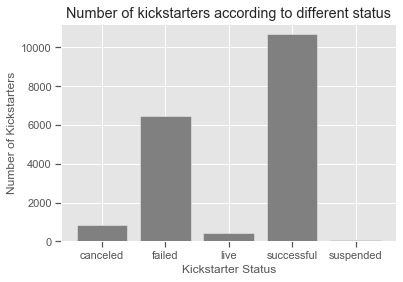

In [545]:
#status in numbers
fig = plt.figure()
plt.bar(x,y, color = "grey")

plt.xlabel("Kickstarter Status") 
plt.ylabel("Number of Kickstarters") 
plt.title("Number of kickstarters according to different status")
fig.savefig('status.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

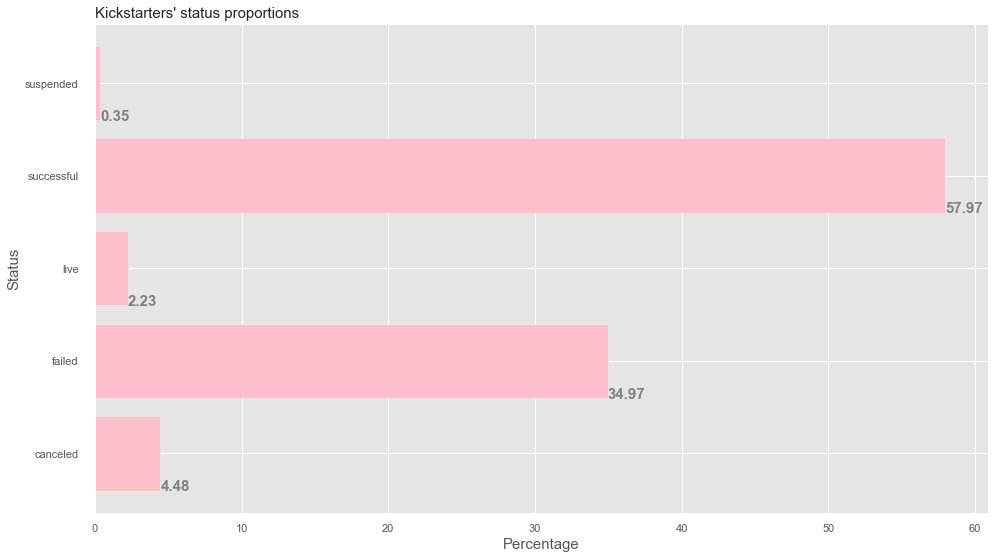

In [533]:
# status in terms of percentages
fig = plt.figure()
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(x, y*100/total, color="pink")
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10)
for i in ax.patches: 
    plt.text(i.get_width(), i.get_y(),  
             str(round((i.get_width()), 2)), 
             fontsize = 15, fontweight ='bold', 
             color ='grey')
    
ax.set_title("Kickstarters' status proportions", 
             loc ='left', fontsize =15) 
ax.set_ylabel("Status", fontsize =15)
ax.set_xlabel("Percentage", fontsize =15)
fig.savefig('status%.png', bbox_inches='tight')

In [366]:
# number of distinct parent categories
df["parent category"].value_counts().count()    #15

# number of distinct sub categories
df["sub category"].value_counts().count()      #159


159

In [76]:
# Most popular categories
# 17801 rows after removing nans

categories = df.groupby(["parent category"]).size().reset_index(name = "counts")
categories.sort_values(["counts"], ascending =False)


,parent category,counts
6,Film & Video,2569
10,Music,2398
13,Technology,1977
0,Art,1797
12,Publishing,1703
8,Games,1252
7,Food,1117
5,Fashion,994
4,Design,860
11,Photography,740


<Figure size 432x288 with 0 Axes>

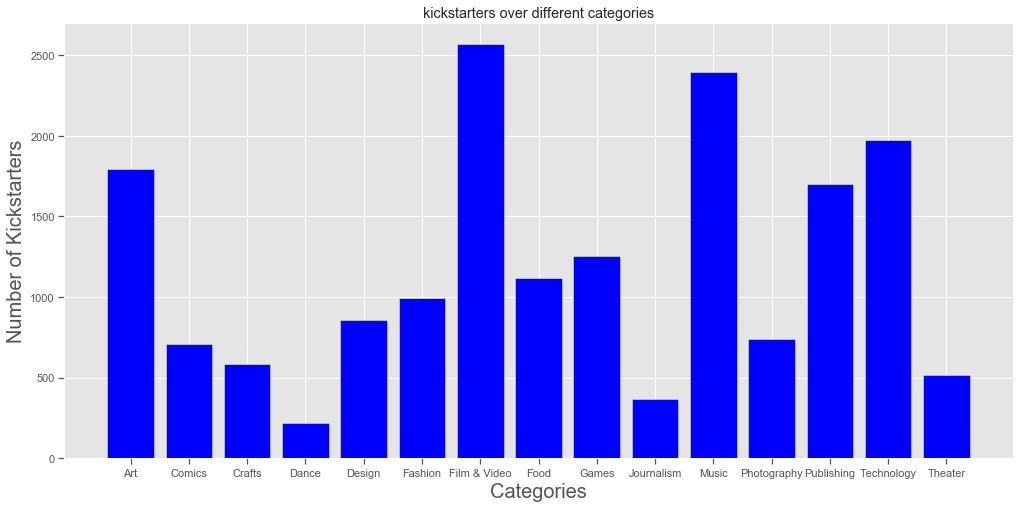

In [546]:
x_ = np.array(categories.iloc[:,0])
y_ = np.array(categories.iloc[:,1])
total = y_.sum()


#categories in numbers
fig = plt.figure()

fig,ax = plt.subplots(figsize=(17,8))
plt.bar(x_,y_, color = "blue")

plt.xlabel("Categories", fontsize=20) 
plt.ylabel("Number of Kickstarters", fontsize=20) 
plt.title("kickstarters over different categories")
fig.savefig('popular_cat.png', bbox_inches='tight')

In [368]:
# most popular sub categories
sub_categories = df.groupby(["parent category", "sub category"]).size()
sub_categories = sub_categories.reset_index(name= "sub_counts")

In [371]:
df.groupby(['parent category','state']).count()[["sub category"]].reset_index().sort_values(["sub category"], ascending=False)

,parent category,state,sub category
52,Music,successful,1589
32,Film & Video,successful,1491
62,Publishing,successful,1180
3,Art,successful,1037
65,Technology,failed,1006
...,...,...,...
16,Dance,live,3
18,Dance,suspended,2
23,Design,suspended,2
53,Music,suspended,1


In [369]:
# top successful and unsuccessful categories by numbers
categories_ = df.groupby(["parent category", "state"]).size().reset_index(name = "counts")
categories_.sort_values(["counts"], ascending =False)


,parent category,state,counts
52,Music,successful,1589
32,Film & Video,successful,1491
62,Publishing,successful,1180
3,Art,successful,1037
65,Technology,failed,1006
...,...,...,...
16,Dance,live,3
18,Dance,suspended,2
23,Design,suspended,2
53,Music,suspended,1


<Figure size 432x288 with 0 Axes>

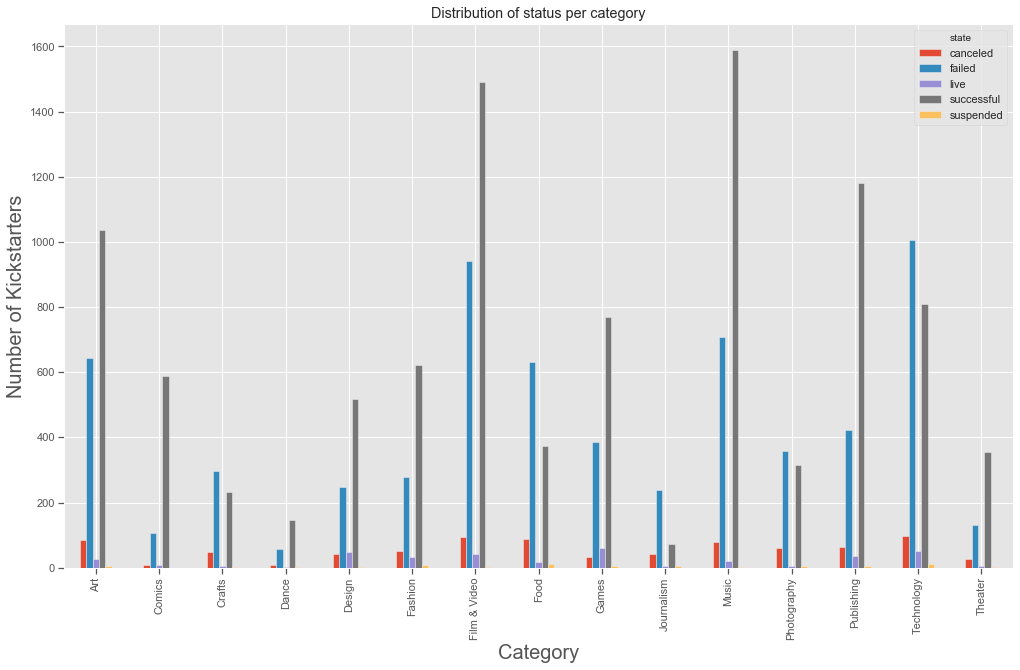

In [547]:
# number of failures and success per category
fig = plt.figure()

ax = categories_.pivot("parent category" , "state", "counts").plot(kind='bar', figsize=(17,10), title = "Distribution of status per category")

ax.set_xlabel("Category", fontsize=20)
ax.set_ylabel("Number of Kickstarters", fontsize=20)

fig.savefig('succ_fail.png', bbox_inches='tight')

In [548]:
#adding columns for time between creation and launch & lauch and deadline of each kickstarter

df ["created_to_launch"] = df["launched_at"] - df["created_at"]
df["launch_to_deadline"] = df["deadline"] - df["launched_at"]

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [376]:
# bifurcating database between successful and failed kickstarters
success_df = df[df["state"] == "successful"]
fail_df = df[df["state"] == "failed"]


In [84]:
# average time between created and launch 
success_df["created_to_launch"].mean()    #51 days
success_df["launch_to_deadline"].mean()   #31 days


Timedelta('31 days 02:42:56.097332')

In [372]:
date_cols = ['deadline','launched_at', 'created_at']
# Create new columns for weekday
def get_weekday(value):
    return value.strftime('%A')
    
for col in date_cols:
    col_name = col + "_weekday"
    df[col_name] = df[col].apply(get_weekday)

df['deadline_weekday'].head()

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       Sunday
1    Wednesday
2    Wednesday
3     Thursday
4     Thursday
Name: deadline_weekday, dtype: object

In [87]:
# average time between launch and deadline

fail_df["created_to_launch"].mean()    #42 days
fail_df["launch_to_deadline"].mean()   #35 days


Timedelta('35 days 02:44:51.901954')

In [375]:
def get_month(value):
    return value.month

def get_day(value):
    return value.day

def get_yr(value):
    return value.year

for col in date_cols:
    col_month = col + "_month"
    df[col_month] = df[col].apply(get_month)
    col_day = col + "_day"
    df[col_day] = df[col].apply(get_day)
    col_yr = col + "_yr"
    df[col_yr] = df[col].apply(get_yr)
   

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

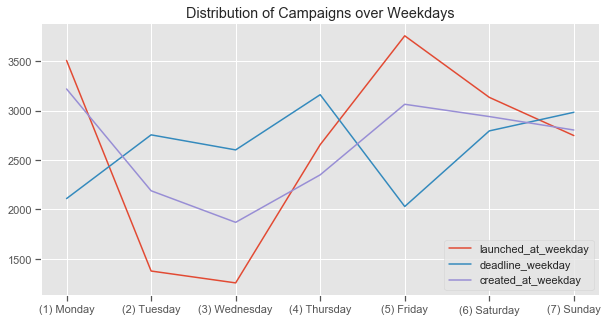

In [374]:
plot_df = pd.concat([df['launched_at_weekday'].value_counts(),
                     df['deadline_weekday'].value_counts(),
                    df['created_at_weekday'].value_counts()], axis=1)
plot_df.index = ["(5) Friday","(1) Monday","(6) Saturday","(7) Sunday","(4) Thursday","(2) Tuesday","(3) Wednesday"]
plot_df = plot_df.sort_index()
plot_df.plot(kind='line', figsize=(10,5), title = "Distribution of Campaigns over Weekdays")

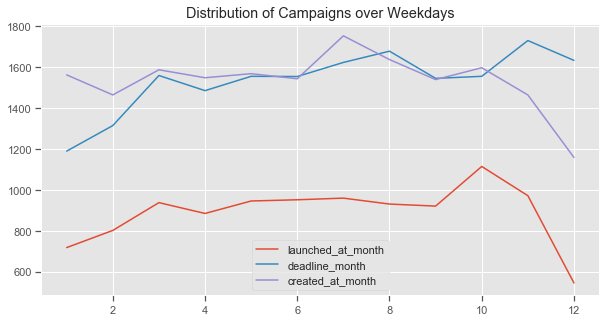

In [380]:
plot_df = pd.concat([success_df['launched_at_month'].value_counts(),
                     df['deadline_month'].value_counts(),
                    df['created_at_month'].value_counts()], axis=1)
plot_df.plot(kind='line', figsize=(10,5), title = "Distribution of successful Campaigns over months")

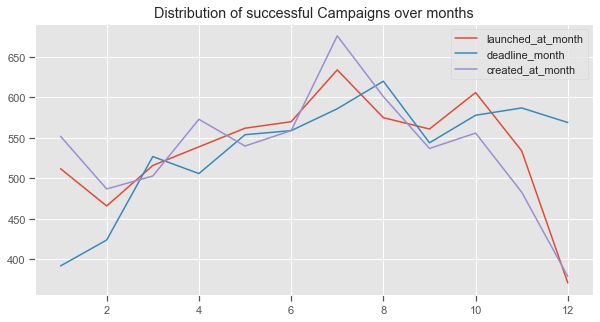

In [381]:
plot_df = pd.concat([fail_df['launched_at_month'].value_counts(),
                     fail_df['deadline_month'].value_counts(),
                    fail_df['created_at_month'].value_counts()], axis=1)
plot_df.plot(kind='line', figsize=(10,5), title = "Distribution of unsuccessful Campaigns over Months")

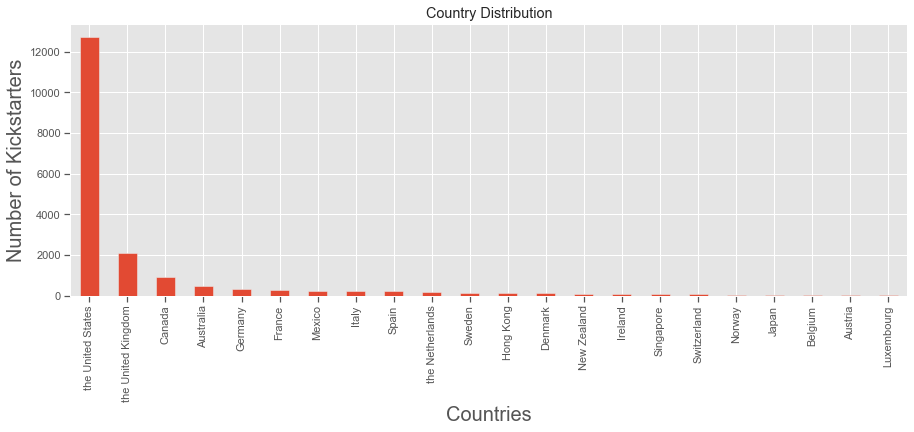

In [549]:
fig = plt.figure()

ax = df['country_displayable_name'].value_counts().plot(kind = 'bar', title = 'Country Distribution', figsize=(15,5))
ax.set_xlabel("Countries", fontsize=20)
ax.set_ylabel("Number of Kickstarters", fontsize=20)
fig.savefig('country.png', bbox_inches='tight')


In [93]:
# ax = df['currency'].value_counts().plot(kind = 'bar', title = 'Currency Distribution', figsize=(15,5))
# ax.set_xlabel("Currencies", fontsize=20)
# ax.set_ylabel("Number of Kickstarters", fontsize=20)

In [94]:
# average goal amount

success_df["goal"].mean()    #13000
fail_df["goal"].mean()       #113500

113493.52699193299

In [95]:
#average backers count

success_df["backers_count"].mean()   #257
fail_df["backers_count"].mean()      #11

11.577412348743406

In [96]:
US_df = df[df["country_displayable_name"] == "the United States"]
US_df.head(5)


,id,backers_count,category,country_displayable_name,location,created_at,launched_at,deadline,currency,pledged,...,created_at_weekday,deadline_month,deadline_day,deadline_yr,launched_at_month,launched_at_day,launched_at_yr,created_at_month,created_at_day,created_at_yr
0,1432554512,6,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",the United States,"{""id"":2471217,""name"":""Philadelphia"",""slug"":""ph...",2018-08-19,2018-12-05,2019-02-03,USD,266.0,...,Sunday,2,3,2019,12,5,2018,8,19,2018
1,1925377347,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",2016-11-29,2016-12-26,2017-01-25,USD,260.0,...,Tuesday,1,25,2017,12,26,2016,11,29,2016
2,1088749014,3,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",the United States,"{""id"":150695,""name"":""Veracruz"",""slug"":""veracru...",2016-11-01,2016-11-02,2016-11-16,USD,185.0,...,Tuesday,11,16,2016,11,2,2016,11,1,2016
3,1876427386,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2489314,""name"":""Savannah"",""slug"":""savann...",2018-01-22,2018-04-10,2018-05-10,USD,35.0,...,Monday,5,10,2018,4,10,2018,1,22,2018
4,671662806,8,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",the United States,"{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...",2019-04-07,2019-04-16,2019-05-16,USD,261.0,...,Sunday,5,16,2019,4,16,2019,4,7,2019


In [97]:
json.loads(US_df.iloc[440]["location"])

{'id': 2388929,
 'name': 'Dallas',
 'slug': 'dallas-tx',
 'short_name': 'Dallas, TX',
 'displayable_name': 'Dallas, TX',
 'localized_name': 'Dallas',
 'country': 'US',
 'state': 'TX',
 'type': 'Town',
 'is_root': False,
 'expanded_country': 'United States',
 'urls': {'web': {'discover': 'https://www.kickstarter.com/discover/places/dallas-tx',
   'location': 'https://www.kickstarter.com/locations/dallas-tx'},
  'api': {'nearby_projects': 'https://api.kickstarter.com/v1/discover?signature=1579202081.e04e6494a69de59060f6fd3efa00881d0fc40b54&woe_id=2388929'}}}

In [98]:
# getting rid of rows which do not have location information
US_data = US_df[US_df["location"].notnull()]

In [99]:
US_data["US_city"] = US_data["location"].apply(lambda x: json.loads(x)['localized_name'])
US_data["US_state"] = US_data["location"].apply(lambda x: json.loads(x)['state'])

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [100]:
# after getting rid of location nans I am left with 12719 rows for US 

In [101]:
US_success = US_data[US_data["state"] == "successful"]
US_fail = US_data[US_data["state"] == "failed"]

In [309]:
US_data.groupby("state").size().reset_index(name= "counts")

x = np.array(a.iloc[:,0])
y = np.array(a.iloc[:,1])
total = y.sum()
y/total
#status in numbers within US
# plt.bar(x, y , color = "green")

# plt.xlabel("Kickstarter Status") 
# plt.ylabel("Number of Kickstarters") 
# plt.title("Number of kickstarters according to different status")

array([0.04475911, 0.34971788, 0.02229818, 0.57969835, 0.00352648])

In [311]:
US_success["backers_count"].mean()     #264.84349324145245
US_fail["backers_count"].mean()        #11.32295719844358


11.32295719844358

In [312]:
# top 5 states with most successful kickstarters 
US_states = US_data.groupby(["US_state", "state"]).size().reset_index(name = "counts")
success_states = US_states[US_states["state"] == "successful"].sort_values(["counts"], ascending =False)
fail_states = US_states[US_states["state"] == "failed"].sort_values(["counts"], ascending =False)



Text(0.5, 1.0, 'Number of successful kickstarters US states')

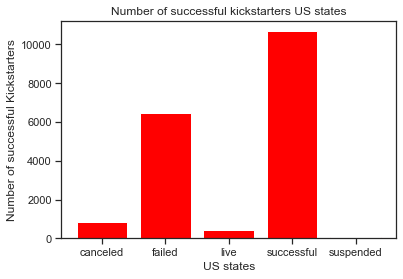

In [308]:
# absolute number of successes in top 5 US states
plt.bar(x[:5], y[:5] , color = "red")
plt.xlabel("US states") 
plt.ylabel("Number of successful Kickstarters") 
plt.title("Number of successful kickstarters US states")

<Figure size 432x288 with 0 Axes>

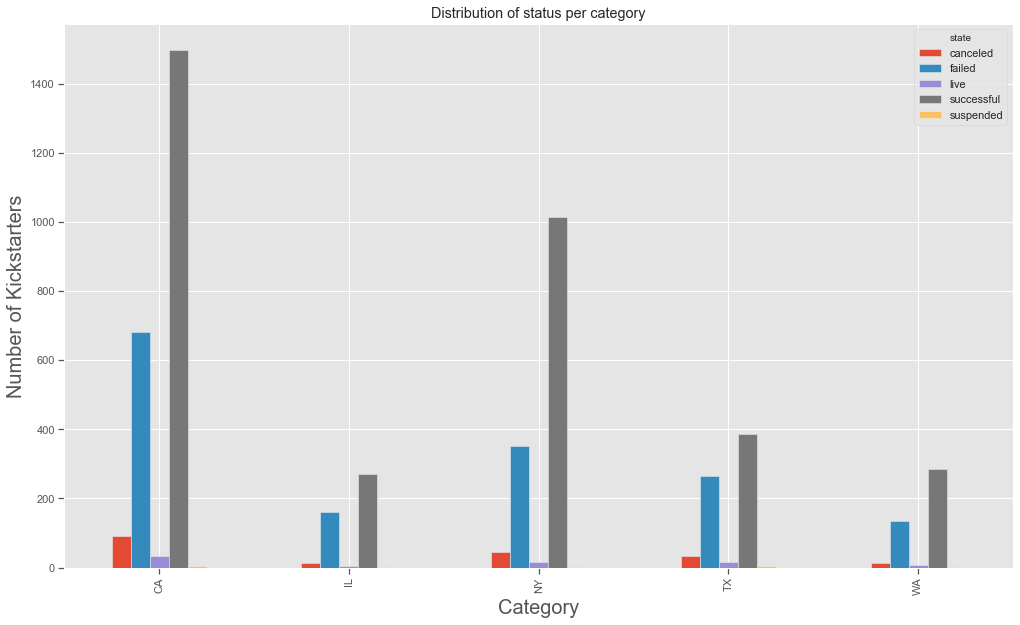

In [550]:
states = US_data.groupby(["US_state", "state"]).size().reset_index(name = "counts").sort_values(["counts"], ascending =False)
plot_states = states[states["US_state"].isin(["CA", "NY","TX", "WA","IL"])]

# number of failures and success in top 5 US states
fig = plt.figure()

ax = plot_states.pivot("US_state" , "state", "counts").plot(kind='bar', figsize=(17,10), title = "Distribution of status per category")

ax.set_xlabel("Category", fontsize=20)
ax.set_ylabel("Number of Kickstarters", fontsize=20)

fig.savefig('states.png', bbox_inches='tight')

In [551]:
selected_states = plot_states.groupby(['US_state', 'state']).agg({'counts': 'sum'})
# Change: groupby state_office and divide by sum
state_pcts = selected_states.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

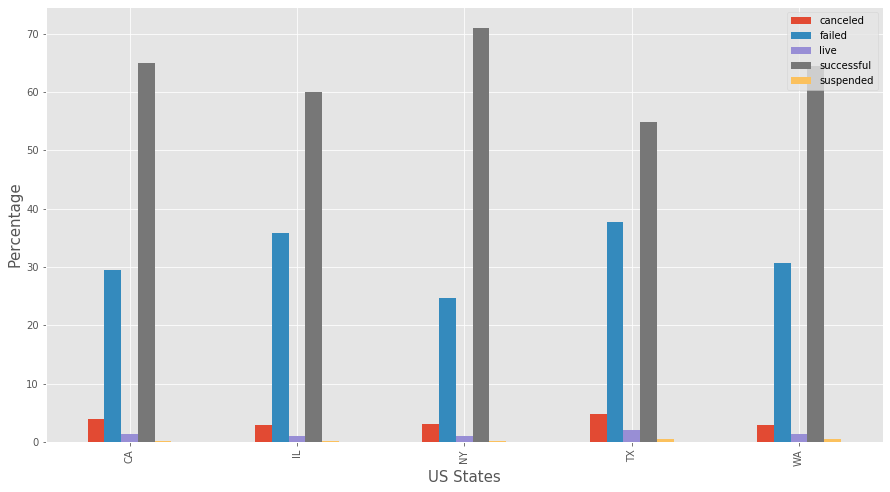

In [112]:
# success in percentages of top 5 US states

ax= state_pcts.unstack(level=1).plot(kind='bar', subplots=False, figsize=(15,8))
ax.set_xlabel("US States", fontsize = 15)
ax.set_ylabel("Percentage", fontsize = 15)

ax.legend(["canceled", "failed", "live", "successful", "suspended"] )


In [315]:
# filter based on top states and popular categories
plot_categories = US_data[US_data["US_state"].isin(["CA", "NY","TX", "WA", "IL"]) & US_data["parent category"].isin(["Film & Video", "Music","Technology","Art","Publishing",
"Games","Food"])]

state_categories = plot_categories.groupby(["US_state","parent category", "state"]).size().reset_index(name = "count")

#number of status per category per state
state_cat_agg = state_categories.groupby(['US_state',"parent category", 'state']).agg({'count': 'sum'})

In [316]:
# percentage of categories per US_state
state_cat_pcts = state_cat_agg.groupby(level=[0,1]).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [317]:
# where are you more likely to succeed in a particular category in terms of percentage
state_cat_pcts.sort_values("count", ascending = False)[:50]

count
US_state parent category state                
NY       Music           successful  78.602620
         Publishing      successful  77.692308
WA       Publishing      successful  74.576271
NY       Film & Video    successful  73.600000
CA       Publishing      successful  73.255814
WA       Music           successful  73.076923
NY       Art             successful  71.875000
IL       Publishing      successful  70.212766
         Music           successful  69.841270
         Games           successful  67.741935
         Art             successful  66.666667
CA       Music           successful  66.554054
TX       Food            failed      66.000000
WA       Film & Video    successful  64.864865
CA       Film & Video    successful  64.091858
NY       Games           successful  64.000000
TX       Music           successful  63.565891
CA       Art             successful  63.207547
         Games           successful  63.025210
WA       Games           successful  62.500000
TX       Art             successful  62.500000
         Games           successful  62.000000
IL       Technology      failed      61.764706
TX       Publishing      successful  61.538462
CA       Technology      successful  58.064516
IL       Food            failed      56.666667
WA       Technology      successful  54.545455
IL       Film & Video    successful  52.307692
NY       Technology      failed      51.685393
TX       Film & Video    successful  51.578947
WA       Art             successful  50.980392
CA       Food            failed      50.000000
WA       Art             failed      47.058824
IL       Film & Video    failed      46.153846
TX       Technology      successful  45.454545
         Film & Video    failed      44.210526
NY       Food            successful  44.000000
                         failed      44.000000
         Technology      successful  43.820225
CA       Food            successful  43.396226
WA       Technology      failed      42.424242
TX       Technology      failed      40.909091
WA       Food            successful  37.931034
                         failed      37.931034
CA       Technology      failed      35.483871
WA       Film & Video    failed      32.432432
TX       Publishing      failed      32.307692
CA       Film & Video    failed      31.524008
TX       Art             failed      31.250000
IL       Music           failed      30.158730

In [318]:
# getting rid of "days" from datetime columns
plot_categories["launch_to_deadline"] = pd.to_timedelta(plot_categories["launch_to_deadline"], errors='coerce').dt.days 
plot_categories["created_to_launch"] = pd.to_timedelta(plot_categories["created_to_launch"], errors='coerce').dt.days

# how quickly are you likely to succeed in a state and in a category in terms of mean days
success_days = plot_categories[plot_categories["state"] == "successful"]
mean_days = success_days.groupby(["US_state","parent category", "state"])["launch_to_deadline"].mean().reset_index(name="mean days")
mean_days.sort_values("mean days")

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,US_state,parent category,state,mean days
24,TX,Games,successful,25.741935
31,WA,Games,successful,26.960000
3,CA,Games,successful,27.786667
17,NY,Games,successful,28.093750
30,WA,Food,successful,28.727273
10,IL,Games,successful,28.809524
23,TX,Food,successful,29.181818
7,IL,Art,successful,29.343750
21,TX,Art,successful,29.400000
33,WA,Publishing,successful,29.522727


In [319]:
# what should be your "goal amount" under a particular category and a state in USA
mean_pledge = success_days.groupby(["US_state","parent category", "state"])["goal"].mean().reset_index(name="mean pledge")
mean_pledge.sort_values("mean pledge")

,US_state,parent category,state,mean pledge
21,TX,Art,successful,2376.550000
7,IL,Art,successful,3806.562500
28,WA,Art,successful,4626.423077
11,IL,Music,successful,5006.250000
0,CA,Art,successful,5190.126866
33,WA,Publishing,successful,5371.136364
32,WA,Music,successful,5663.017544
12,IL,Publishing,successful,6260.272727
8,IL,Film & Video,successful,6478.911765
25,TX,Music,successful,6544.158537


In [382]:
# what is the average number of backers under a particular category and a state in USA
mean_backers = success_days.groupby(["US_state","parent category", "state"])["backers_count"].mean().reset_index(name="mean backers")
mean_backers.sort_values("mean backers")

,US_state,parent category,state,mean backers
21,TX,Art,successful,52.475000
8,IL,Film & Video,successful,87.205882
25,TX,Music,successful,88.024390
11,IL,Music,successful,88.454545
0,CA,Art,successful,90.619403
28,WA,Art,successful,93.923077
18,NY,Music,successful,96.800000
14,NY,Art,successful,98.000000
7,IL,Art,successful,98.218750
23,TX,Food,successful,99.000000


In [392]:
# what is the average number days between creation and launch of a successful kickstarter for a particular category and a state in USA
mean_created_to_launch = success_days.groupby(["US_state","parent category", "state"])["created_to_launch"].mean().reset_index(name="mean launch days")
mean_created_to_launch.sort_values("mean launch days")



,US_state,parent category,state,mean launch days
9,IL,Food,successful,16.750000
22,TX,Film & Video,successful,25.632653
7,IL,Art,successful,26.218750
14,NY,Art,successful,28.934783
26,TX,Publishing,successful,32.050000
21,TX,Art,successful,34.225000
24,TX,Games,successful,34.580645
34,WA,Technology,successful,37.555556
0,CA,Art,successful,38.216418
23,TX,Food,successful,39.000000


In [393]:
# what is the average number days between launch and deadline of a successful kickstarter for a particular category and a state in USA
mean_launch_to_deadline = success_days.groupby(["US_state","parent category", "state"])["launch_to_deadline"].mean().reset_index(name="mean deadline days")
mean_launch_to_deadline.sort_values("mean deadline days")


,US_state,parent category,state,mean deadline days
24,TX,Games,successful,25.741935
31,WA,Games,successful,26.960000
3,CA,Games,successful,27.786667
17,NY,Games,successful,28.093750
30,WA,Food,successful,28.727273
10,IL,Games,successful,28.809524
23,TX,Food,successful,29.181818
7,IL,Art,successful,29.343750
21,TX,Art,successful,29.400000
33,WA,Publishing,successful,29.522727


In [552]:
# getting publishing data for CA and NY for hypothesis testing

h_CA_pub_data = US_data[(US_data["US_state"] == "CA") & (US_data["parent category"] == "Publishing") & (US_data["state"].isin(["successful", "failed"]))]

In [553]:
h_CA_pub_data["state"] = h_CA_pub_data["state"].replace(["successful","failed"], [1,0])

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [554]:
h_NY_pub_data = US_data[(US_data["US_state"] == "NY") & (US_data["parent category"] == "Publishing") & (US_data["state"].isin(["successful", "failed"]))]
h_NY_pub_data["state"] = h_NY_pub_data["state"].replace(["successful","failed"], [1,0])

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### $${H}_{0}$$: there is no difference in success probability of a publishing kickstarter between CA and NY

In [555]:
import scipy.stats as stats
t,p = stats.ttest_ind(h_CA_pub_data["state"],h_NY_pub_data["state"], equal_var=False)

print(h_CA_pub_data["state"].mean()- h_NY_pub_data["state"].mean())
print(h_NY_pub_data["state"].mean())

-0.04436363636363638
0.808


In [508]:

# res = stats.mannwhitneyu(h_CA_pub_data["state"],h_NY_pub_data["state"], alternative="less")
# print("p-value for Nick > Matt: {:2.3f}".format(res.pvalue))

In [431]:
#p-value for success frequency comparison between NY & CA in publishing category
p     #0.36 do not reject null

0.3610810314647326

In [437]:
h_NY_mus_data = US_data[(US_data["US_state"] == "NY") & (US_data["parent category"] == "Music") & (US_data["state"].isin(["successful", "failed"]))]
h_NY_mus_data["state"] = h_NY_mus_data["state"].replace(["successful","failed"], [1,0])

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [441]:
h_TX_mus_data = US_data[(US_data["US_state"] == "TX") & (US_data["parent category"] == "Music") & (US_data["state"].isin(["successful", "failed"]))]
h_TX_mus_data["state"] = h_TX_mus_data["state"].replace(["successful","failed"], [1,0])

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [438]:
t,p = stats.ttest_ind(h_NY_mus_data["state"],h_TX_mus_data["state"], equal_var=False)

In [440]:
#p-value for success frequency comparison between NY & TX in music category
p    #0.017 reject null

0.01761623607638731

In [457]:
# hypothesis testing between music and Film&Video categories

df_music = df[(df["parent category"] == "Music") & (df["state"].isin(["successful", "failed"]))]
df_fv = df[(df["parent category"] == "Film & Video") & (df["state"].isin(["successful", "failed"]))]
df_music["state"] = df_music["state"].replace(["successful","failed"], [1,0])
df_fv["state"] = df_fv["state"].replace(["successful","failed"], [1,0])

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [464]:
t,p = stats.ttest_ind(df_fv["state"],df_music["state"], equal_var=False)

In [465]:
#p-value for success frequency comparison between Film&Video & music category
p    #0.00000001663 reject null

1.58418496095801e-08

In [461]:
df_ph = df[(df["parent category"] == "Photography") & (df["state"].isin(["successful", "failed"]))]
df_ph["state"] = df_ph["state"].replace(["successful","failed"], [1,0])

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [466]:
t,p = stats.ttest_ind(df_ph["state"],df_music["state"], equal_var=False)

In [467]:
p    #0.0000000 reject null

4.9063468626098434e-24

In [529]:
h_CA_pub_data_array = np.array(h_CA_pub_data["state"])

In [498]:
def get_beta_dist_params(state_samples):
    state_samples = np.array(state_samples)
    total_success = state_samples.sum()
    total = len(state_samples)
    alpha = total_success + 1
    beta = (total - total_success) + 1
    mean = 1 * total_success / total
    return alpha, beta, mean, total_success, total


In [519]:
num_simulations = 10000
alpha, beta = get_beta_dist_params(h_CA_pub_data_array)[:2]
dist_CA = stats.beta(alpha, beta)

print(alpha, beta)
alpha, beta = get_beta_dist_params(h_NY_pub_data["state"])[:2]
dist_NY = stats.beta(alpha, beta)

print(alpha, beta)

simulated_CA = dist_CA.rvs(num_simulations)
simulated_NY = dist_NY.rvs(num_simulations)

print((simulated_NY > simulated_CA).mean())


127 40
102 25
0.8197


In [526]:
num_simulations = 1000
alpha, beta = get_beta_dist_params(df_music["state"])[:2]
dist_mus = stats.beta(alpha, beta)

alpha, beta = get_beta_dist_params(df_fv["state"])[:2]
dist_fv = stats.beta(alpha, beta)

simulated_mus = dist_mus.rvs(num_simulations)
simulated_fv = dist_fv.rvs(num_simulations)

print((simulated_mus > simulated_fv).mean())
print(df_music["state"].mean()-df_fv["state"].mean())
df_music["state"].shape
df_fv["state"].shape

1.0
0.07814299559039228


(2431,)

In [513]:
from statsmodels.stats.power import tt_ind_solve_power

In [518]:
#very low power for welch t test between NY and CA publishing samples, hence chose to do Baye's testing

tt_ind_solve_power(effect_size= 0.04436363636363638, nobs1=167, alpha=0.05, power=None, ratio=127/167, alternative='two-sided')

0.06630933941003728

In [528]:
# acceptable power of test between music and Film & Video.
tt_ind_solve_power(effect_size= 0.07814299559039228, nobs1=None, alpha=0.05, power=0.8, ratio=2298/2431, alternative='two-sided')




2646.1102705125422